 Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Reading the files

In [3]:
train=pd.read_csv(r"C:\Users\dell\Desktop\projects\Machine Learning\EMG Project\trainset_60.csv")
validation=pd.read_csv(r"C:\Users\dell\Desktop\projects\Machine Learning\EMG Project\validate_20.csv")
test=pd.read_csv(r"C:\Users\dell\Desktop\projects\Machine Learning\EMG Project\testset_20.csv")



Making Histogram for each feature
        

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


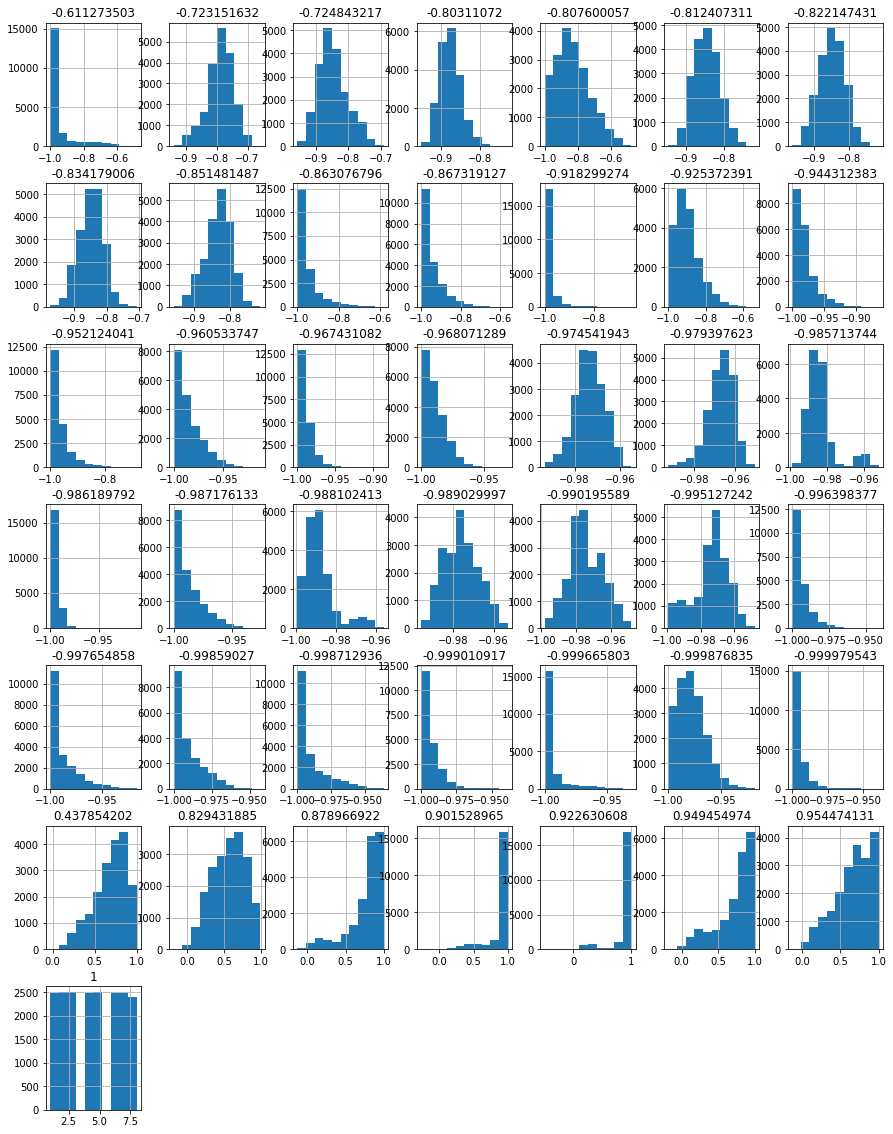

In [4]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train.hist(ax = ax)
plt.show()

Converting the dataframe to numpy array

In [5]:
train=train.values
validation=validation.values
test=test.values


Separating the independent and dependent values

In [65]:
train_x,train_y=train[:,:-1],train[:,-1]
validation_x,validation_y=validation[:,:-1],validation[:,-1]
test_x,test_y=test[:,:-1],test[:,-1]

Data Visualization

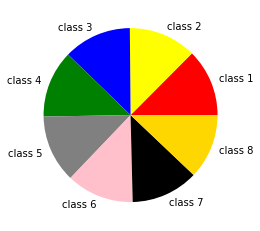

class count: [2480, 2490, 2496, 2475, 2489, 2479, 2475, 2391]


In [7]:
#pie chart
list_count=[]
count_each={1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0}
for i in range(train_y.shape[0]):
    count_each[train_y[i]]+=1
for i in count_each:
    list_count.append(count_each[i])
labels='class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8'
colors=['red','yellow','blue','green','gray','pink','black','gold']
plt.pie(list_count,labels=labels,colors=colors)
plt.show()
print("class count:",list_count)

In [50]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
svm=SVC(gamma='auto')
log_reg=LogisticRegression(multi_class='auto',solver='newton-cg',max_iter=300)
knn=KNeighborsClassifier(n_neighbors=5)
dt=DecisionTreeClassifier(max_depth=5)
extra_t=ExtraTreeClassifier(max_depth=6)
rfc=RandomForestClassifier(n_estimators=15)

In [29]:
for clf in (svm,log_reg,knn,dt,extra_t,rfc):
    clf.fit(train_x,train_y)
    acc=clf.score(validation_x,validation_y)
    print("Classifier :{}, Score :{}".format(clf.__class__.__name__,acc))

Classifier :SVC, Score :0.9024009092200597
Classifier :LogisticRegression, Score :0.9238528200028413
Classifier :KNeighborsClassifier, Score :0.9330870862338401
Classifier :DecisionTreeClassifier, Score :0.6806364540417673
Classifier :ExtraTreeClassifier, Score :0.5121466117346214
Classifier :RandomForestClassifier, Score :0.9637732632476204


Hyperparameter tuning using GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV 

For SVM

In [36]:
param={'C':[1,10,100,1000],'kernel':['linear','poly','rbf','sigmoid'],'gamma':[0.1,0.5,0.8,1]}
svm_gscv=GridSearchCV(estimator=svm,param_grid=param,scoring='accuracy',n_jobs=-1,cv=10)
svm_gscv.fit(validation_x,validation_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.5, 0.8, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [37]:
print(svm_gscv.best_params_)
print(svm_gscv.best_score_)

{'C': 10, 'gamma': 0.8, 'kernel': 'poly'}
0.9630629350760052


For Logistics Regression

In [30]:
paramLR=[{'solver':['saga','liblinear'],'penalty':['l1'],'C':[0.1,10,100,1000]},{'solver':['newton-cg','lbfgs'],'penalty':['l2'],'C':[0.1,10,100,1000]}]
lr_gscv=GridSearchCV(estimator=log_reg,param_grid=paramLR,scoring='accuracy',n_jobs=-1,cv=10)
lr_gscv.fit(validation_x,validation_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=300, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='newton-cg',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [0.1, 10, 100, 1000], 'penalty': ['l1'],
                          'solver': ['saga', 'liblinear']},
                         {'C': [0.1, 10, 100, 1000], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fals

In [35]:
print(lr_gscv.best_params_)
print(lr_gscv.best_score_)

{'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9519818155988067


For KNN

In [59]:
paramKNN={'n_neighbors':[10,11,12,13,14],'weights':['uniform','distance'],'algorithm':['ball_tree','brute','auto']}
knn_gscv=GridSearchCV(estimator=knn,param_grid=paramKNN,scoring='accuracy',n_jobs=-1,cv=10)
knn_gscv.fit(validation_x,validation_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'brute', 'auto'],
                         'n_neighbors': [10, 11, 12, 13, 14],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [63]:
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)

{'algorithm': 'ball_tree', 'n_neighbors': 14, 'weights': 'distance'}
0.9009802528768291


For Decision Tree

In [42]:
paramDT={'criterion':['gini','entropy'],'max_depth':[6,7,10,12,13,14,15,16,17,18]}
DT_gscv=GridSearchCV(estimator=dt,param_grid=paramDT,scoring='accuracy',n_jobs=-1,cv=10)
DT_gscv.fit(validation_x,validation_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 10, 12, 13, 14, 15, 16, 17, 18]},
  

In [43]:
print(DT_gscv.best_params_)
print(DT_gscv.best_score_)

{'criterion': 'entropy', 'max_depth': 14}
0.8781076857508169


For Extra Tree

In [39]:
paramExtraT={'criterion':['gini','entropy'],'max_depth':[6,7,10,15,18,20,21,22,23,24,25,30]}
ET_gscv=GridSearchCV(estimator=extra_t,param_grid=paramExtraT,scoring='accuracy',n_jobs=-1,cv=10)
ET_gscv.fit(validation_x,validation_y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=ExtraTreeClassifier(class_weight=None, criterion='gini',
                                           max_depth=6, max_features='auto',
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           random_state=None,
                                           splitter='random'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 10, 15, 18, 20, 21, 22, 23, 24, 25,
                                       30]},
             pre_dispatch='2*n_jobs', refi

In [40]:
print(ET_gscv.best_params_)
print(ET_gscv.best_score_)

{'criterion': 'entropy', 'max_depth': 22}
0.8025287682909504


For Random Forests

In [33]:
paramRfc={'n_estimators':[40,41,42,43,44,45,46,47,48,49],'max_depth':[50,51,52,53,54,55,56,57,58,59]}
RF_gscv=GridSearchCV(estimator=rfc,param_grid=paramRfc,scoring='accuracy',n_jobs=-1,cv=10)
RF_gscv.fit(validation_x,validation_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=15, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [34]:
print(RF_gscv.best_params_)
print(RF_gscv.best_score_)

{'max_depth': 56, 'n_estimators': 40}
0.9451626651512999


Creating Tuned Models for each classifier

In [57]:
tuned_knn=KNeighborsClassifier(n_neighbors=14,algorithm='ball_tree',weights='distance')
tuned_knn.fit(train_x,train_y)
y_predict_knn=tuned_knn.predict(test_x)
tuned_knn.score(test_x,test_y)


0.9363545958232703

In [58]:
tuned_dt=DecisionTreeClassifier(criterion='entropy',max_depth=17)
tuned_dt.fit(train_x,train_y)
y_predict_dt=tuned_dt.predict(test_x)
tuned_dt.score(test_x,test_y)

0.9214377042193493

In [59]:
tuned_lr=LogisticRegression(C=1000,penalty='l2',solver='newton-cg',max_iter=300)
tuned_lr.fit(train_x,train_y)
y_predict_lr=tuned_lr.predict(test_x)
tuned_lr.score(test_x,test_y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9683193635459583

In [48]:
tuned_svm=SVC(C=10,gamma=0.8,kernel='poly')
tuned_svm.fit(train_x,train_y)
y_predict_SVM=tuned_svm.predict(test_x)
tuned_svm.score(test_x,test_y)


0.9731495951129422

In [60]:
tuned_rf=RandomForestClassifier(max_depth=56,n_estimators=40)
tuned_rf.fit(train_x,train_y)
y_predict_rf=tuned_rf.predict(test_x)
tuned_rf.score(test_x,test_y)

0.970308282426481

In [62]:
tuned_et=ExtraTreeClassifier(criterion='entropy',max_depth=22)
tuned_et.fit(train_x,train_y)
y_predict_et=tuned_et.predict(test_x)
tuned_et.score(test_x,test_y)

0.8545247904531894

Ensemble Modelling

VOTING 

In [63]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier(estimators=[('lr',tuned_lr),('svm',tuned_svm),('rf',tuned_rf),('et',tuned_et),('knn',tuned_knn),('dt',tuned_dt)],voting='hard')
voting_clf.fit(train_x,train_y)


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1000, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=300,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='newton-cg', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svm',
                              SVC(C=10, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_funct...
                                                   p=2, weights='distance')),
                             ('d

In [68]:
y_predict_vc=voting_clf.predict(test_x)
voting_clf.score(test_x,test_y)

0.9782639579485722

BAGGING

In [71]:
from sklearn.ensemble import BaggingClassifier

In [74]:
bg_knn=BaggingClassifier(KNeighborsClassifier(algorithm='ball_tree',n_neighbors=14,weights='distance'),n_estimators=500,max_samples=100,bootstrap=True,oob_score=True,n_jobs=-1)
bg_knn.fit(train_x,train_y)
pred1=bg_knn.predict(test_x)
print(bg_knn.score(test_x,test_y))

0.8715726665719562


In [75]:
bg_knn.oob_score_

0.8706447534766119

In [76]:
bg_svm=BaggingClassifier(SVC(C=10,gamma=0.8,kernel='poly'),n_estimators=500,max_samples=100,bootstrap=True,oob_score=True,n_jobs=-1)
bg_svm.fit(train_x,train_y)
pred2=bg_svm.predict(test_x)
print(bg_svm.score(test_x,test_y))

0.9208694416820571


In [79]:
bg_lr=BaggingClassifier(LogisticRegression(C=1000,penalty='l2',solver='newton-cg'),n_estimators=500,max_samples=100,bootstrap=True,oob_score=True,n_jobs=-1,random_state=7)
bg_lr.fit(train_x,train_y)
pred3=bg_lr.predict(test_x)
print(bg_lr.score(test_x,test_y))

0.9239948856371644


In [78]:
bg_dt=BaggingClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=17),n_estimators=500,max_samples=100,bootstrap=True,oob_score=True,n_jobs=-1)
bg_dt.fit(train_x,train_y)
pred4=bg_dt.predict(test_x)
print(bg_dt.score(test_x,test_y))

0.9235686887341952


In [82]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=15,random_state=5)
score=cross_val_score(,train_x,train_y,cv=kf)
print(score.mean())

0.8308983944627815


In [31]:
cm_SVM=confusion_matrix(test_y,y_predict_SVM)
print(cm_SVM)
print("accuracy score:",accuracy_score(test_y,y_predict_SVM))

[[877   0   1   0   0   0   0   0]
 [  0 888   0   0   0   0   0   0]
 [  1   0 872   5   0   0   0   0]
 [  0   0   4 862   1   4  26   0]
 [  0   1   1   0 869   3   0   0]
 [  0   0   1   4   1 871   6   0]
 [  0   0   0  71   0  20 807   0]
 [  0   1  25  33   0   0   1 783]]
accuracy score: 0.970166216792158


Printing the classification report on test data; which gives us precision, recall and f1 score for all classes

In [32]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_predict_SVM))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       878
         2.0       1.00      1.00      1.00       888
         3.0       0.96      0.99      0.98       878
         4.0       0.88      0.96      0.92       897
         5.0       1.00      0.99      1.00       874
         6.0       0.97      0.99      0.98       883
         7.0       0.96      0.90      0.93       898
         8.0       1.00      0.93      0.96       843

    accuracy                           0.97      7039
   macro avg       0.97      0.97      0.97      7039
weighted avg       0.97      0.97      0.97      7039



Making Logitics Regresion Classifier

In [99]:
cm_LR=confusion_matrix(test_y,y_predict_LR)
print(cm_LR)
print("accuracy score:",accuracy_score(test_y,y_predict_LR))

[[875   0   1   0   0   2   0   0]
 [  0 887   1   0   0   0   0   0]
 [  0   0 867   7   1   2   0   1]
 [  0   0   7 837   1   6  43   3]
 [  0   0   2   0 868   4   0   0]
 [  0   5   8   5   3 850  12   0]
 [  0   0   0  52   2  30 814   0]
 [  0   0   3  21   0   0   2 817]]
accuracy score: 0.9681772979116352


Printing the classification report on test data; which gives us precision, recall and f1 score for all classes

In [100]:
print(classification_report(test_y, y_predict_LR))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       878
         2.0       0.99      1.00      1.00       888
         3.0       0.98      0.99      0.98       878
         4.0       0.91      0.93      0.92       897
         5.0       0.99      0.99      0.99       874
         6.0       0.95      0.96      0.96       883
         7.0       0.93      0.91      0.92       898
         8.0       1.00      0.97      0.98       843

    accuracy                           0.97      7039
   macro avg       0.97      0.97      0.97      7039
weighted avg       0.97      0.97      0.97      7039

